# Visualisation ontologie

In [1]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import graphviz as gv

In [2]:
filename = "ontology_properties_v0.json"

with open(filename) as f:
    dict_onto = json.load(f)

print(json.dumps(dict_onto, indent=2))

{
  "AircraftDataProp": {
    "AircraftCharacteristics": {
      "AircraftDimensions": {
        "AircraftLength": "",
        "AircratSpan": ""
      },
      "AircraftMasses": {
        "AircraftFuelCapacity": "",
        "AircraftMLW": ""
      },
      "AircraftRequirements": {
        "AircraftACN": "",
        "AircraftARFF": ""
      }
    },
    "AircrafFlightParameters": {
      "LiveParameters": {
        "LiveAltitude": "",
        "LiveCurrentWeight": "",
        "LiveMAR": "",
        "LiveSpeeds": {
          "LiveIAS": "",
          "LiveVz": ""
        },
        "LiveSR": ""
      },
      "ReferenceParameters": {
        "ReferenceClimb": {
          "ReferenceVclimb": ""
        },
        "ReferenceCruise": {
          "ReferenceCruiseAltitudes": {
            "ReferenceCruiseFL": "",
            "ReferenceMORA": "",
            "ReferenceZpOpt": ""
          }
        },
        "ReferenceDescent": {
          "ReferenceDescentFL": "",
          "ReferenceVdescent"

In [3]:
g = nx.DiGraph()


def add_node(parent, mark):
    g.add_edges_from([(parent, mark)])

def depth_search(tree, node, tab):
    if isinstance(tree, str):
        return
    
    key = list(tree.keys())[0]
    for subnode, subtree in tree.items():
        print(f"{'  '*tab}({node}) {subnode}")
        add_node(node, subnode)
        depth_search(subtree, subnode, tab+1)

In [4]:
depth_search(dict_onto, "Properties", 0)

(Properties) AircraftDataProp
  (AircraftDataProp) AircraftCharacteristics
    (AircraftCharacteristics) AircraftDimensions
      (AircraftDimensions) AircraftLength
      (AircraftDimensions) AircratSpan
    (AircraftCharacteristics) AircraftMasses
      (AircraftMasses) AircraftFuelCapacity
      (AircraftMasses) AircraftMLW
    (AircraftCharacteristics) AircraftRequirements
      (AircraftRequirements) AircraftACN
      (AircraftRequirements) AircraftARFF
  (AircraftDataProp) AircrafFlightParameters
    (AircrafFlightParameters) LiveParameters
      (LiveParameters) LiveAltitude
      (LiveParameters) LiveCurrentWeight
      (LiveParameters) LiveMAR
      (LiveParameters) LiveSpeeds
        (LiveSpeeds) LiveIAS
        (LiveSpeeds) LiveVz
      (LiveParameters) LiveSR
    (AircrafFlightParameters) ReferenceParameters
      (ReferenceParameters) ReferenceClimb
        (ReferenceClimb) ReferenceVclimb
      (ReferenceParameters) ReferenceCruise
        (ReferenceCruise) ReferenceCruis

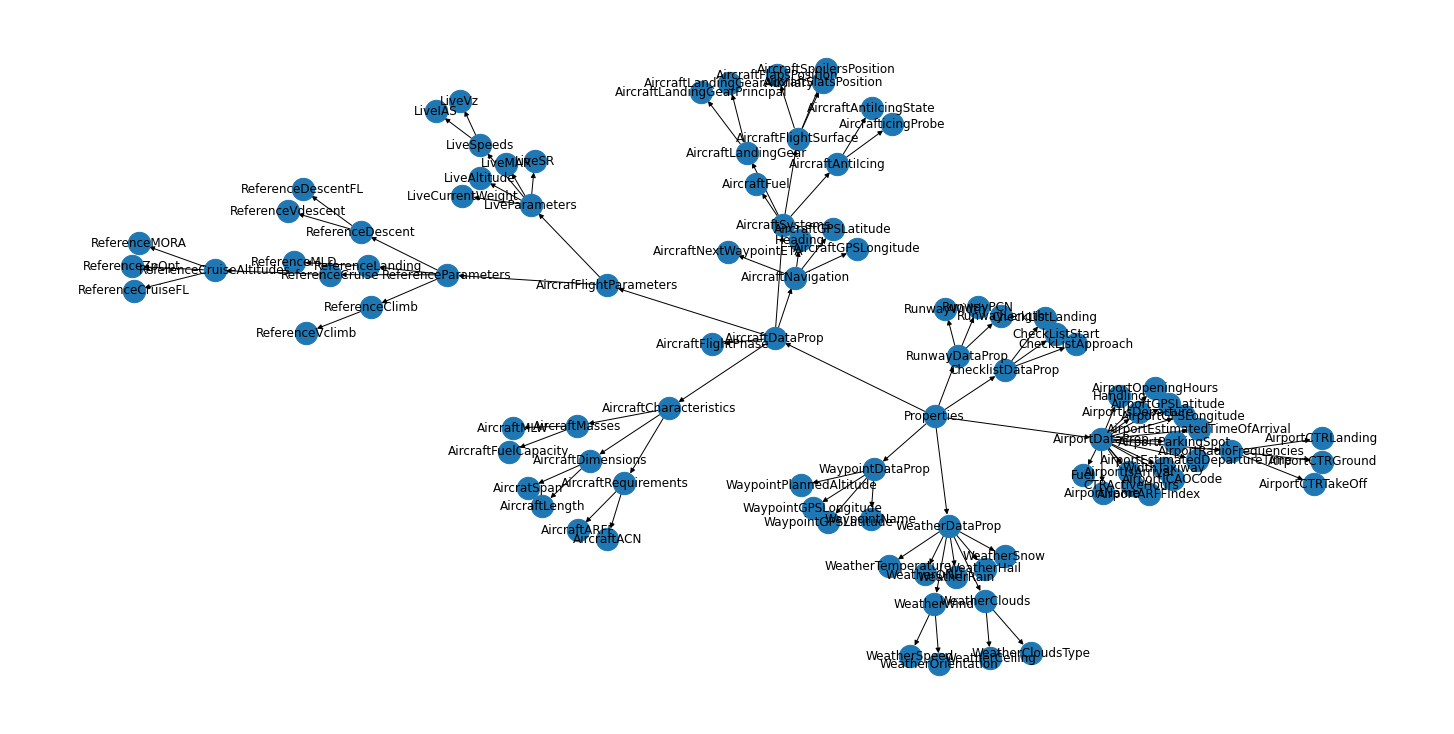

In [6]:
from networkx.drawing.nx_pydot import graphviz_layout
plt.figure(figsize=(20, 10))
pos = graphviz_layout(g, prog="fdp")
nx.draw(g, pos, with_labels=True, node_size = 500)
plt.show()

In [7]:
nx.drawing.nx_pydot.write_dot(g, 'networkx_graph')

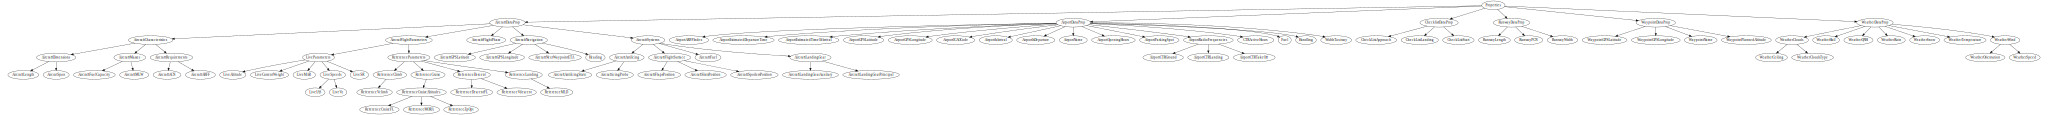

In [8]:
gv.render('dot', 'svg', 'networkx_graph')


from IPython.display import SVG, display
display(SVG('networkx_graph.svg'))

# from IPython.display import Image
# Image(filename='networkx_graph.png')